In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
df = pd.read_csv("SimTodActData.csv")
df = df.drop("Unnamed: 0", 1)
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})

In [10]:
df.head()

,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,running z,...,z fft bin 1,z fft bin 10,z fft bin 2,z fft bin 3,z fft bin 4,z fft bin 5,z fft bin 6,z fft bin 7,z fft bin 8,z fft bin 9
0,chris,climbing,"[[-9.5, 0.5, -3.5], [-9.5, 0.5, -3.5], [-9.5, ...","[-9.5, -9.5, -9.5, -9.5, -9.3000000000000007, ...","[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.5, -3.5, -3.5, -3.5, -3.3999999999999999, ...","[10.136567466356647, 10.136567466356647, 10.13...",[ -4.695 -5.165 -5.635 -6.105 -6.575 -7.0...,[ 0.11 0.12 0.13 0.135 0.14 0.145 0....,[-1.715 -1.88 -2.045 -2.21 -2.375 -2.54 -2....,...,-3.232653,-3.589796,-3.493878,-4.061224,-5.138776,-4.463265,-4.224490,-2.646939,-4.108163,-3.681633
1,chris,climbing,"[[-8.5999999999999996, -0.90000000000000002, -...","[-8.5999999999999996, -8.5999999999999996, -8....","[-0.90000000000000002, -0.90000000000000002, -...","[-4.5999999999999996, -4.5999999999999996, -5....","[9.79438614717635, 9.79438614717635, 10.076705...",[-4.29 -4.725 -5.16 -5.585 -6.01 -6.435 -6....,[-0.525 -0.545 -0.565 -0.565 -0.565 -0.565 -0....,[ -2.54 -2.8 -3.06 -3.325 -3.59 -3.8...,...,-6.544898,-4.797959,-8.657143,-7.426531,-9.861224,-8.867347,-7.914286,-6.471429,-4.300000,-4.553061
2,chris,climbing,"[[-8.0999999999999996, -2.5, -5.59999999999999...","[-8.0999999999999996, -8.0999999999999996, -8....","[-2.5, -2.5, -2.5, -2.5, -2.5, -2.399999999999...","[-5.5999999999999996, -5.5999999999999996, -5....","[10.159724405711014, 10.159724405711014, 10.15...",[ -3.925 -4.315 -4.705 -5.095 -5.485 -5.8...,[ -1.22500000e+00 -1.39000000e+00 -1.5550000...,[-2.575 -2.82 -3.065 -3.31 -3.555 -3.8 -4....,...,-4.334694,-0.479592,-5.991837,-6.261224,-7.177551,-6.502041,-3.738776,-1.197959,-1.061224,-0.555102
3,chris,climbing,"[[-9.9000000000000004, 0.40000000000000002, -0...","[-9.9000000000000004, -9.9000000000000004, -9....","[0.40000000000000002, 0.40000000000000002, 0.4...","[-0.40000000000000002, -0.40000000000000002, -...","[9.916148445843275, 9.916148445843275, 9.91614...",[ -4.915 -5.405 -5.895 -6.385 -6.88 -7.3...,[ 0.235 0.26 0.285 0.31 0.335 0.36 0....,[-0.235 -0.26 -0.285 -0.31 -0.325 -0.34 -0....,...,-0.457143,-1.720408,-0.416327,-0.355102,-0.493878,-1.340816,-1.683673,-1.224490,-0.889796,-1.385714
4,chris,climbing,"[[-8.9000000000000004, -1.0, -1.3], [-8.900000...","[-8.9000000000000004, -8.9000000000000004, -8....","[-1.0, -1.0, -1.0, -1.0, -1.3, -1.3, -1.3, -1....","[-1.3, -1.3, -1.3, -1.3, -2.2999999999999998, ...","[9.049861877399014, 9.049861877399014, 9.04986...",[ -4.69 -5.175 -5.66 -6.145 -6.62 -7.0...,[ -5.75000000e-01 -6.25000000e-01 -6.7500000...,[-0.93 -1.025 -1.12 -1.215 -1.305 -1.395 -1....,...,-1.959184,-4.144898,-2.997959,-4.204082,-2.940816,-4.955102,-6.606122,-7.785714,-8.532653,-5.969388


In [47]:
Y = df['activity']
# features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 
#             'y mean','z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x std', 'y std', 'z std',
#             'xy mean', 'yz mean', 'xz mean', 'x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 
#             'z noise max', 'x noise std', 'y noise std', 'z noise std' , 'x fft min', 'y fft min', 'z fft min', 
#             'x fft max', 'y fft max', 'z fft max', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft std', 'y fft std',
#             'z fft std', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted']
features_ind = list(range(16,104))
X = df[features_ind]
feature_names = X.columns.tolist()
print(len(feature_names))
print(feature_names)
groups = df.subject.unique()
X.head()

88
['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean', 'x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 'z noise max', 'x noise std', 'y noise std', 'z noise std', 'x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y

,max,min,std,skew,kurtosis,mean,median,x max,y max,z max,...,z fft bin 1,z fft bin 10,z fft bin 2,z fft bin 3,z fft bin 4,z fft bin 5,z fft bin 6,z fft bin 7,z fft bin 8,z fft bin 9
0,17.071614,8.243179,0.925769,4.562170,32.637325,9.955701,9.837174,-6.3,3.9,-1.4,...,-3.232653,-3.589796,-3.493878,-4.061224,-5.138776,-4.463265,-4.224490,-2.646939,-4.108163,-3.681633
1,13.430562,7.487323,0.824620,0.630912,3.033556,9.978078,9.920181,-1.2,4.6,-3.8,...,-6.544898,-4.797959,-8.657143,-7.426531,-9.861224,-8.867347,-7.914286,-6.471429,-4.300000,-4.553061
2,21.606018,7.023532,1.582400,3.149278,17.073516,9.935971,9.825477,-5.1,8.8,0.4,...,-4.334694,-0.479592,-5.991837,-6.261224,-7.177551,-6.502041,-3.738776,-1.197959,-1.061224,-0.555102
3,11.011812,8.877500,0.380226,0.127423,1.434714,9.883468,9.916148,-8.2,3.1,0.0,...,-0.457143,-1.720408,-0.416327,-0.355102,-0.493878,-1.340816,-1.683673,-1.224490,-0.889796,-1.385714
4,13.397761,7.946068,0.931903,0.791689,1.875121,9.950243,9.804591,-2.3,5.5,-1.3,...,-1.959184,-4.144898,-2.997959,-4.204082,-2.940816,-4.955102,-6.606122,-7.785714,-8.532653,-5.969388


In [61]:
# features analysis
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = df[feature_names]
Y = df['activity']

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

1. feature 'x mean' (1.000000)
2. feature 'min' (0.955575)
3. feature 'x fft bin 10' (0.883472)
4. feature 'x max' (0.753480)
5. feature 'x fft bin 6' (0.751749)
6. feature 'x noise std' (0.727321)
7. feature 'z noise std' (0.707057)
8. feature 'std' (0.702664)
9. feature 'x median' (0.693409)
10. feature 'x fft bin 3' (0.689266)
11. feature 'x fft std' (0.683519)
12. feature 'x fft bin 5' (0.653818)
13. feature 'x fft mean weighted' (0.649548)
14. feature 'x std' (0.644910)
15. feature 'x fft median' (0.626631)
16. feature 'x fft bin 1' (0.622473)
17. feature 'x fft mean' (0.612392)
18. feature 'x fft max' (0.610059)
19. feature 'x fft bin 8' (0.571049)
20. feature 'z fft mean weighted' (0.571048)
21. feature 'z fft median' (0.567686)
22. feature 'x fft bin 4' (0.538723)
23. feature 'x noise max' (0.525293)
24. feature 'z fft mean' (0.495104)
25. feature 'x min' (0.484936)
26. feature 'x fft bin 7' (0.479270)
27. feature 'x fft bin 9' (0.456567)
28. feature 'max' (0.441860)
29. featur

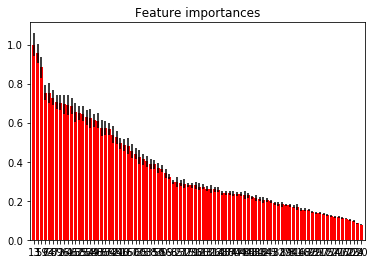

In [62]:
# normalize feature importances

importances = np.array(importances)
importances /= importances.max()

for f in range(X.shape[1]):
    print("%d. feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [63]:
# select features > 40 % importance
features = [i for i,j in zip(feature_names,importances) if j > 0.25]

print ("Selected number of features: %d" % len(features))

for f in range(len(features)):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
    
print(features)

Selected number of features: 50
1. feature x mean (1.000000)
2. feature min (0.955575)
3. feature x fft bin 10 (0.883472)
4. feature x max (0.753480)
5. feature x fft bin 6 (0.751749)
6. feature x noise std (0.727321)
7. feature z noise std (0.707057)
8. feature std (0.702664)
9. feature x median (0.693409)
10. feature x fft bin 3 (0.689266)
11. feature x fft std (0.683519)
12. feature x fft bin 5 (0.653818)
13. feature x fft mean weighted (0.649548)
14. feature x std (0.644910)
15. feature x fft median (0.626631)
16. feature x fft bin 1 (0.622473)
17. feature x fft mean (0.612392)
18. feature x fft max (0.610059)
19. feature x fft bin 8 (0.571049)
20. feature z fft mean weighted (0.571048)
21. feature z fft median (0.567686)
22. feature x fft bin 4 (0.538723)
23. feature x noise max (0.525293)
24. feature z fft mean (0.495104)
25. feature x min (0.484936)
26. feature x fft bin 7 (0.479270)
27. feature x fft bin 9 (0.456567)
28. feature max (0.441860)
29. feature x fft bin 2 (0.424852)

In [64]:
class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





In [65]:
def grid(X_train,y_train):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    models = [#[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
    #                                            'min_samples_leaf': [1, 5, 10, 15, 20],#     v
    #                                            'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              ]

    # models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

    # models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    #models.append([svm.SVC(kernel='rbf', class_weight={1:10,9:1}), {#'kernel': ['rbf'], # class_weight="balanced"; tol
                              # 'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               #'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
    #models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])





    models.append([RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                               }, "Random Forest"])

    models_with_best_params = []

    # cross-validation strategy
    cv = 10 # for 10-folds cross-validation

    # Leave One Group Out
    groups = y_train.unique()
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)


    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = cv)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        print(model[2], ": ")
        print("Best score for ", model[2], ":", clf.best_score_)
        print()
        print("Best parameters for ", model[2], " found on development set:", best_params)
#         print()
#         print("Best estimator for ", model[2], " model:", best_estimator)
        print()
#         print()

#         print("Grid scores on development set:")
#         print()
#         for params, mean_score, scores in clf.grid_scores_:
#             print("%0.3f (+/-%0.03f) for %r"
#                   % (mean_score, scores.std() * 2, params))
        print()

#     print(models_with_best_params)
    
    return best_params['n_estimators']

In [66]:
def run(pram, X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=pram)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='Confusion matrix, without normalization: Random Forest')

    plt.show()
    
    return metrics.accuracy_score(expected,predicted)

9
chris
(63, 104)
(503, 104)
Random Forest : 
Best score for  Random Forest : 0.827037773359841

Best parameters for  Random Forest  found on development set: {'n_estimators': 90}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.75000   0.60000   0.66667         5
    running    1.00000   0.18182   0.30769        11
    sitting    1.00000   0.91667   0.95652        12
   sleeping    1.00000   0.90909   0.95238        11
   standing    0.75000   1.00000   0.85714        12
    walking    0.50000   0.83333   0.62500        12

avg / total    0.83730  

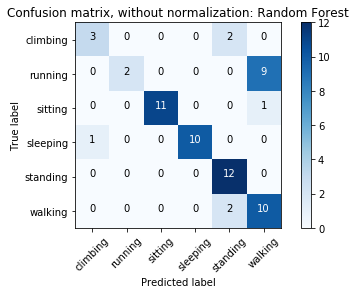

david
(61, 104)
(505, 104)
Random Forest : 
Best score for  Random Forest : 0.8118811881188119

Best parameters for  Random Forest  found on development set: {'n_estimators': 250}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.16667   1.00000   0.28571         2
    running    1.00000   1.00000   1.00000        11
    sitting    0.84615   0.91667   0.88000        12
   sleeping    1.00000   1.00000   1.00000        13
   standing    1.00000   0.83333   0.90909        12
    walking    1.00000   0.18182   0.30769        11

avg / total    0.94241 

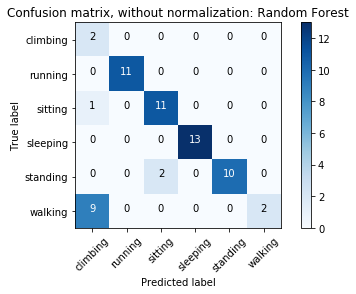

denee
(61, 104)
(505, 104)
Random Forest : 
Best score for  Random Forest : 0.8514851485148515

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    1.00000   0.60000   0.75000         5
    running    0.91667   1.00000   0.95652        11
    sitting    1.00000   0.27273   0.42857        11
   sleeping    1.00000   1.00000   1.00000        11
   standing    0.37500   0.25000   0.30000        12
    walking    0.41667   0.90909   0.57143        11

avg / total    0.75683   

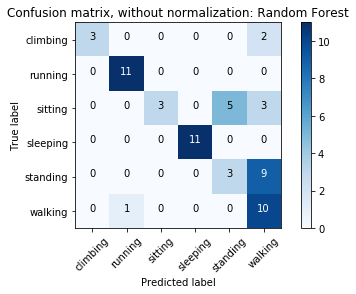

gia
(63, 104)
(503, 104)
Random Forest : 
Best score for  Random Forest : 0.8031809145129225

Best parameters for  Random Forest  found on development set: {'n_estimators': 20}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.66667   1.00000   0.80000         4
    running    1.00000   1.00000   1.00000        12
    sitting    0.90000   0.75000   0.81818        12
   sleeping    1.00000   0.91667   0.95652        12
   standing    0.76923   0.83333   0.80000        12
    walking    0.90909   0.90909   0.90909        11

avg / total    0.89996   0.

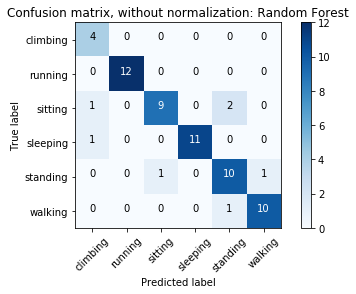

ilona
(62, 104)
(504, 104)
Random Forest : 
Best score for  Random Forest : 0.871031746031746

Best parameters for  Random Forest  found on development set: {'n_estimators': 20}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.66667   0.66667   0.66667         3
    running    0.52174   1.00000   0.68571        12
    sitting    0.52632   0.83333   0.64516        12
   sleeping    1.00000   1.00000   1.00000        12
   standing    0.75000   0.25000   0.37500        12
    walking    0.00000   0.00000   0.00000        11

avg / total    0.57382   0

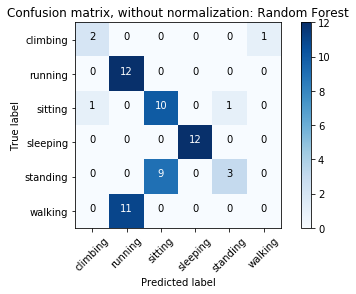

julia
(66, 104)
(500, 104)
Random Forest : 
Best score for  Random Forest : 0.794

Best parameters for  Random Forest  found on development set: {'n_estimators': 150}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.83333   1.00000   0.90909         5
    running    1.00000   0.25000   0.40000        12
    sitting    1.00000   1.00000   1.00000        13
   sleeping    1.00000   0.91667   0.95652        12
   standing    0.92308   1.00000   0.96000        12
    walking    0.55000   0.91667   0.68750        12

avg / total    0.89157   0.83333   0

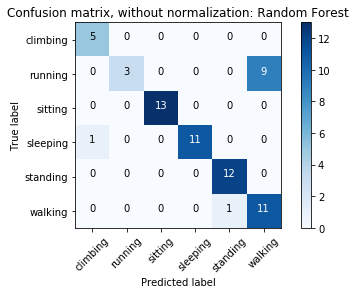

katie
(64, 104)
(502, 104)
Random Forest : 
Best score for  Random Forest : 0.8187250996015937

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.83333   0.83333   0.83333         6
    running    1.00000   0.58333   0.73684        12
    sitting    0.33333   0.18182   0.23529        11
   sleeping    1.00000   0.69231   0.81818        13
   standing    0.52381   1.00000   0.68750        11
    walking    0.66667   0.90909   0.76923        11

avg / total    0.73065   

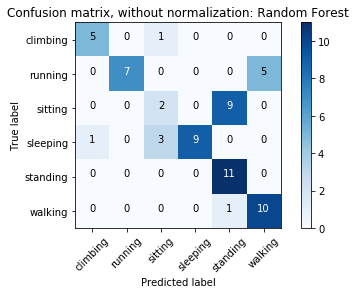

lili
(65, 104)
(501, 104)
Random Forest : 
Best score for  Random Forest : 0.8083832335329342

Best parameters for  Random Forest  found on development set: {'n_estimators': 80}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.75000   0.75000   0.75000         4
    running    0.91667   1.00000   0.95652        11
    sitting    1.00000   0.58333   0.73684        12
   sleeping    1.00000   0.93333   0.96552        15
   standing    0.52174   1.00000   0.68571        12
    walking    0.80000   0.36364   0.50000        11

avg / total    0.84837   0

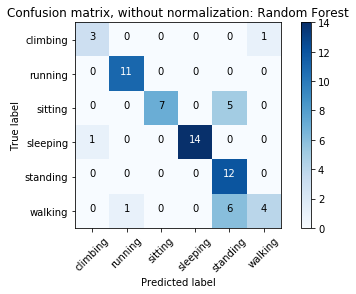

noel
(61, 104)
(505, 104)
Random Forest : 
Best score for  Random Forest : 0.807920792079208

Best parameters for  Random Forest  found on development set: {'n_estimators': 250}


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

   climbing    0.75000   0.75000   0.75000         4
    running    1.00000   1.00000   1.00000        12
    sitting    0.44444   0.72727   0.55172        11
   sleeping    1.00000   1.00000   1.00000        12
   standing    0.33333   0.09091   0.14286        11
    walking    0.91667   1.00000   0.95652        11

avg / total    0.74818   

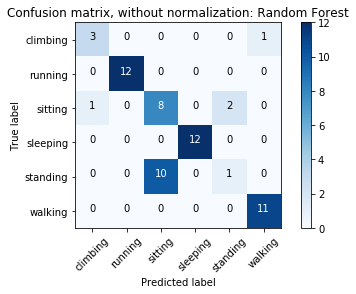

0.759019585128


In [67]:
a = []
print(len(groups))
for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    X_test = test[features]
    y_test = test['activity']
    print(test.shape)
    train = df.loc[(df.subject != g)]
    print(train.shape)
    X_train = train[features]
    y_train = train['activity']
    pram = grid(X_train,y_train)
    a.append(run(pram,X_train,y_train,X_test,y_test))
avg = np.array(a)
print(np.mean(avg))    
    
